In [72]:
import os
notebook_abs_path = os.path.abspath(os.getcwd())
REPO_ROOT = os.path.join(notebook_abs_path, os.pardir, os.pardir)

import sys
sys.path.append(REPO_ROOT)

from nebula.misc.plots import set_size

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

import numpy as np
import pandas as pd



In [108]:
def get_results(infolder, metric, how):
    stats = pd.DataFrame()
    
    for file in os.listdir(infolder):
        if "downstream_pretrained" in file:
            # stats = write_metric_to_df(stats, index="pretrained", metric=metric, how=how)
            index="pretrained"
            ratio = float(file.split("_")[2])
            metrics = pd.read_csv(os.path.join(infolder, file, f"{index}_csv", "version_0", "metrics.csv"))
            if how in ["max", "best"]:
                stats.loc[index, ratio] = metrics[metric].max()
            elif how == "last":
                stats.loc[index, ratio] = metrics[metric].iloc[-1]
            else:
                raise ValueError(f"Unknown how: {how}")

    non_pretrained_baseline_df = pd.read_csv(os.path.join(infolder, "downstream_non_pretrained_1704971666", "non_pretrained_csv", "version_0", "metrics.csv"))
    non_pretrained_baseline = non_pretrained_baseline_df[metric].max()

    full_data_baseline_df = pd.read_csv(os.path.join(infolder, "downstream_full_data_1704971666", "full_data_csv", "version_0", "metrics.csv"))
    full_data_baseline = full_data_baseline_df[metric].max()

    return non_pretrained_baseline, full_data_baseline, stats

In [131]:
def plot_stats(stats, non_pretrained_baseline, full_data_baseline=None, ax=None, ytitle=""):
    if ax is None:
        fig, ax = plt.subplots(figsize=set_size())

    ax.plot(stats.columns, stats.loc["pretrained"], label="pretrained", linestyle='-', marker='o')
    ax.axhline(y=non_pretrained_baseline, color='r', linestyle='--', label="non-pretrained")
    if full_data_baseline is not None:
        ax.axhline(y=full_data_baseline, color='g', linestyle='--', label="full data")
    ax.set_ylabel(ytitle, fontsize=14)

    # set xticks as existing ticks * 100 and report as %
    ax.set_xticks(stats.columns)
    ax.set_xticklabels([f"{int(t*100)}%" for t in stats.columns], fontsize=14)
    ax.set_xlabel("Unlabeled Data Ratio of Training Set", fontsize=14)
    
    return ax


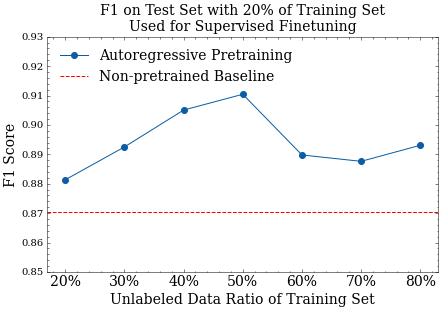

In [168]:
infolder = "out_autoregressive_unlabeled_ratio_loop_1709722547"

non_pretrained_baseline, full_data_baseline, stats = get_results(infolder, "val_f1", "max")

drop_cols = []#[0.8, 0.6]
stats = stats.drop(columns=drop_cols)

ax = plot_stats(stats, non_pretrained_baseline, None, ytitle="F1 Score")

handles, labels = ax.get_legend_handles_labels()
new_labels = [
    'Autoregressive Pretraining',
    'Non-pretrained Baseline',
]
ax.legend(handles, new_labels, loc='upper left', fontsize=14)
ax.set_title("F1 on Test Set with 20% of Training Set\nUsed for Supervised Finetuning", fontsize=14)
ax.set_ylim(0.85, 0.93)
non_pretrained_baseline, full_data_baseline, stats

plt.savefig('img/autoregressive_unlabeled_ratio_loop_f1.pdf', dpi=300, bbox_inches='tight')


(0.8025376518538234,
 0.868944619593971,
                  0.2       0.3       0.4       0.5       0.6       0.7  \
 pretrained  0.826127  0.845518  0.855443  0.872543  0.857632  0.828721   
 
                  0.8  
 pretrained  0.836079  )

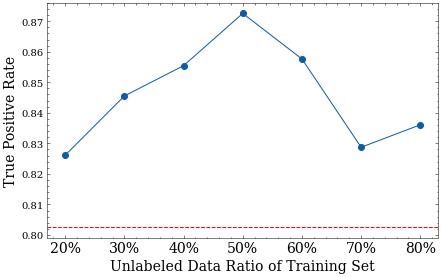

In [169]:
infolder = "out_autoregressive_unlabeled_ratio_loop_1709722547"

non_pretrained_baseline, full_data_baseline, stats = get_results(infolder, "val_tpr", "max")

drop_cols = []# [0.8, 0.6]
stats = stats.drop(columns=drop_cols)

plot_stats(stats, non_pretrained_baseline, None, ytitle="True Positive Rate")

plt.savefig('img/autoregressive_unlabeled_ratio_loop_tpr.pdf', dpi=300, bbox_inches='tight')

non_pretrained_baseline, full_data_baseline, stats